<a href="https://colab.research.google.com/github/Hiji1023/dl_jacobian/blob/main/Logistic_Regression_N_Feature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Logistic Regression (N Feature)**##

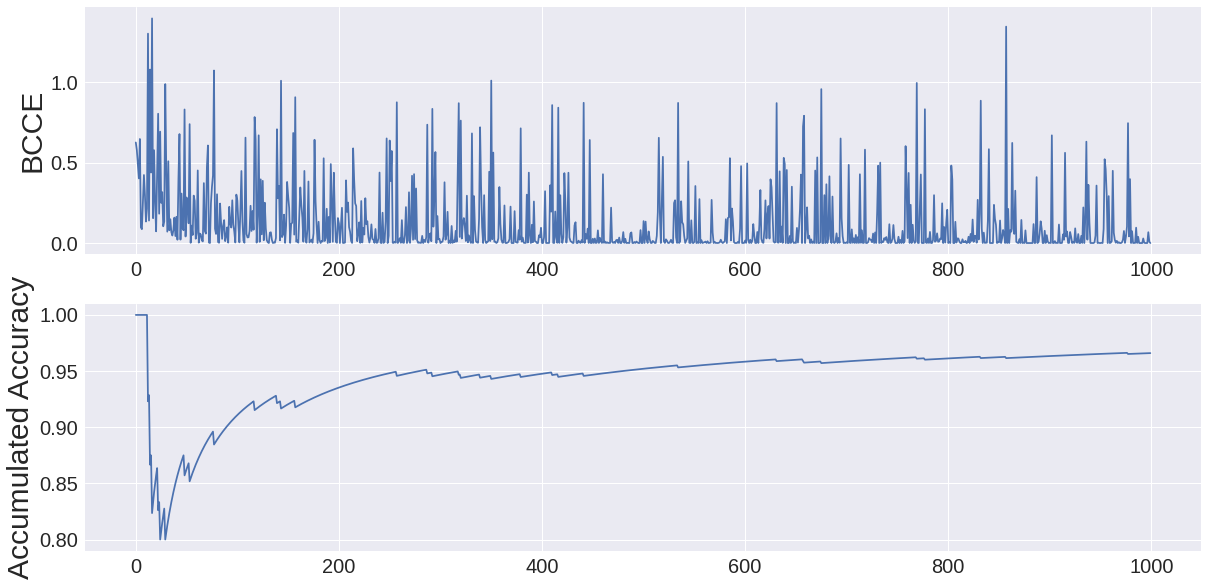

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
np.random.seed(1)
plt.style.use('seaborn')

# set params
N, n_feature = 1000, 3
lr = 0.3
t_W = np.random.uniform(-1, 1, (n_feature, 1))
t_b = np.random.uniform(-1, 1, (1, ))
W = np.random.uniform(-1, 1, (n_feature, 1))
b = np.random.uniform(-1, 1, (1, 1))

#generate dataset
x_data = np.random.randn(N, n_feature)
y_data = x_data @ t_W +t_b
y_data = 1/(1+np.exp(-y_data))
y_data = (y_data > 0.5).astype(int)

J_track, acc_track = list(), list()
n_correct = 0
for data_idx, (X, y) in enumerate(zip(x_data, y_data)):
  # forward propagation
  z = X @ W + b
  pred = 1/(1+np.exp(-z))
  J = -(y*np.log(pred)+(1-y)*np.log(1-pred))
  J_track.append(J.squeeze())

  # calculate accumulated accuracy
  # 누적될수록 학습이 잘되고 있다
  pred_ = (pred > 0.5).astype(int).squeeze()
  if pred_ == y:
    n_correct += 1
  acc_track.append(n_correct/(data_idx + 1))
  
  # jacobians
  dJ_dpred = (pred-y)/(pred*(1-pred))
  dpred_dz = pred*(1-pred)
  # gradient라 row vector로 바꿔줌
  dz_dW = X.reshape(1, -1)
  dz_db = 1

  # backpropagation
  dJ_dz = dJ_dpred*dpred_dz
  dJ_dW = dJ_dz*dz_dW
  dJ_db = dJ_dz*dz_db

  # parameter update
  W = W - lr*dJ_dW.T
  b = b - lr*dJ_db

# visualize results
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
axes[0].plot(J_track)
axes[1].plot(acc_track)

axes[0].set_ylabel("BCCE", fontsize=30)
axes[0].tick_params(labelsize=20)
axes[1].set_ylabel("Accumulated Accuracy", fontsize=30)
axes[1].tick_params(labelsize=20)